In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")


sample_size = 100
percent_ill = 0.5


In [70]:
# Генерируем данные для больной группы

def generate_ill(ss):
    group_data = {
    'is_ill': np.ones(ss, dtype=int),
    'F1': np.random.normal(loc=6, scale=2, size=ss),
    'F2': np.random.normal(loc=6, scale=3, size=ss),
    'F3': np.random.normal(loc=4, scale=1, size=ss),
    'F4': np.random.normal(loc=7, scale=2, size=ss),
    'F5': np.random.normal(loc=5, scale=1, size=ss)
    }
    
    group_data = pd.DataFrame(group_data)
    return group_data

    # Генерируем данные для здоровой группы
def generate_healthy(ss):
    group_data = {
    'is_ill': np.zeros(ss, dtype=int),
    'F1': np.random.normal(loc=3, scale=1, size=ss),
    'F2': np.random.normal(loc=7, scale=2, size=ss),
    'F3': np.random.normal(loc=6, scale=2, size=ss),
    'F4': np.random.normal(loc=5, scale=2, size=ss),
    'F5': np.random.normal(loc=3, scale=1, size=ss)
        }
    
    group_data = pd.DataFrame(group_data)
    return group_data


In [79]:
def draw_scatter(df, out_var):

    # Separate features and labels
    X = df.drop(out_var, axis=1)
    y = df[out_var]

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=1)
    X_tsne = tsne.fit_transform(X)

    # Create a DataFrame with the t-SNE results
    df_tsne = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
    df_tsne[out_var] = y

    # Plot the scatterplot
    plt.figure(figsize=(8, 6))
    colors = {0: 'red', 1: 'green',2:'orange'}  # Assign colors to classes
    plt.scatter(df_tsne['Component 1'], df_tsne['Component 2'], c=df_tsne[out_var].map(colors), alpha=0.5)
    plt.title('t-SNE Scatterplot of Two Groups')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

In [72]:
def log_regression(df, out_var):

    formula = f"{out_var} ~ F1+F2+F3+F4+F5"

    model = smf.logit(formula=formula, data=df).fit()
    
    print(model.summary())

In [73]:
village_a = generate_ill(sample_size)
village_b = generate_ill(int(sample_size*percent_ill))
village_b = pd.concat([village_b, generate_healthy(int(sample_size*(1-percent_ill)))], ignore_index=True)



In [77]:
#Search ill in second village

log_regression(village_b,"is_ill")

Optimization terminated successfully.
         Current function value: 0.189020
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 is_ill   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.7273
Time:                        23:50:28   Log-Likelihood:                -18.902
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 3.541e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4475      2.636     -1.308      0.191      -8.613       1.718
F1             0.9649      0.

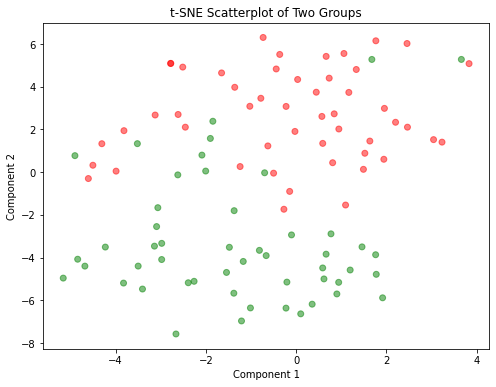

In [80]:
#Search visible clusters in second village highlight ill

draw_scatter(village_b, "is_ill")

